In [73]:
import numpy as np
import scipy as sp
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt
import itertools as it
import h5py

In [2]:
cnts = sc.read_h5ad( "Tabula_muris_10x.h5ad" )

In [3]:
exprs = cnts.copy()
exprs.X = sp.sparse.vstack( np.sqrt( cnts.X[i,:] ) / np.sqrt( cnts.X[i,:].sum() ) for i in range(cnts.n_obs) )

SPARSE

In [61]:
blocksize = 1000
n_blocks = ( exprs.n_obs + blocksize - 1 ) // blocksize
s_towers_list = []
for colblock in range(5): #range( n_blocks )
    print( f"{colblock}: ", end="" )
    colblock_start = blocksize * colblock
    colblock_end = min( exprs.n_obs, blocksize * (colblock+1) )
    a2t = exprs.X[ colblock_start : colblock_end, ].transpose()
    s_tower = []
    for rowblock in range(5): #range( n_blocks ):
        print( f"{rowblock} ", end="" )
        rowblock_start = blocksize * rowblock
        rowblock_end = min( exprs.n_obs, blocksize * (rowblock+1) )
        a1 = exprs.X[ rowblock_start : rowblock_end, ]
        s = ( a1 * a2t )
        s.data[ s.data < .8 ] = 0
        s.eliminate_zeros()
        s_tower.append( s )
    print()
    s_towers_list.append( sp.sparse.vstack( s_tower ) )
sim = sp.sparse.hstack( s_towers_list )

0: 0 1 2 3 4 
1: 0 1 2 3 4 
2: 0 1 2 3 4 
3: 0 1 2 3 4 
4: 0 1 2 3 4 


DENSE

In [76]:
blocksize = 1000
n_blocks = ( exprs.n_obs + blocksize - 1 ) // blocksize
s_towers_list = []
for colblock in range( n_blocks ):
    print( f"{colblock}: ", end="" )
    colblock_start = blocksize * colblock
    colblock_end = min( exprs.n_obs, blocksize * (colblock+1) )
    a2t = exprs.X[ colblock_start : colblock_end, ].transpose()
    s_tower = []
    for rowblock in range( n_blocks ):
        print( f"{rowblock} ", end="" )
        rowblock_start = blocksize * rowblock
        rowblock_end = min( exprs.n_obs, blocksize * (rowblock+1) )
        a1 = exprs.X[ rowblock_start : rowblock_end, ]
        s = ( a1 * a2t )
        s_tower.append( s.todense() )
    print()
    s_towers_list.append( np.vstack( s_tower ) )
sim = np.hstack( s_towers_list )

with h5py.File("sims.hdf5", "w") as f:
    f.create_dataset( 'sim_matrix', data=sim )

0: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
1: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
2: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
3: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
4: 0 1 2 3 4 5 6 7 8 9 

KeyboardInterrupt: 

DENSE HDF5

In [108]:
blocksize = 1000
n_blocks = ( exprs.n_obs + blocksize - 1 ) // blocksize

h5f = h5py.File( "sims.hdf5", "w" )
h5dset = h5f.create_dataset( "sim_matrix", ( exprs.n_obs, exprs.n_obs ), dtype='f')

for rowblock in range( n_blocks ):
    
    print( f"{rowblock}: ", end="" )
    rowblock_start = blocksize * rowblock
    rowblock_end = min( exprs.n_obs, blocksize * (rowblock+1) )
    a1 = exprs.X[ rowblock_start : rowblock_end, ]
    
    for colblock in range( n_blocks ):
        print( f"{colblock} ", end="" )
        colblock_start = blocksize * colblock
        colblock_end = min( exprs.n_obs, blocksize * (colblock+1) )
    
        a2t = exprs.X[ colblock_start : colblock_end, ].transpose()
        s = ( a1 * a2t ).todense()
        h5dset[ rowblock_start : rowblock_end, colblock_start : colblock_end ] = s
        #h5dset.write_direct( s, np._s[ : block_size, : block_size ], 
        #   np.s_[ rowblock_start : rowblock_end, colblock_start : colblock_end ] )
    
    print()
    
h5f.close()

0: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
1: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
2: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
3: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
4: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
5: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
6: 0 1 2 3 4 5 6 7 8 9 10 11

50: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
51: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
52: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
53: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
54: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 
55: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 


In [107]:
h5f.close()

In [114]:
h5f = h5py.File( "sims.hdf5", "r" )
h5sim = h5f["sim_matrix"]

In [158]:
inds = np.transpose( np.vstack( [ sp.random.choice(exprs.n_obs,10000), sp.random.choice(exprs.n_obs,10000) ] ) )
#inds = inds[ inds.argsort(axis=0)[:,0], : ]
%time a = [ h5sim[ inds[i,0], inds[i,1] ] for i in range(len(inds))  ]

CPU times: user 2.32 s, sys: 583 ms, total: 2.9 s
Wall time: 5.28 s


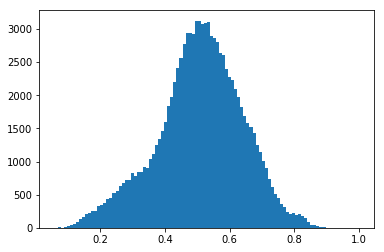

In [171]:
a = np.fromiter( ( h5sim[ sp.random.choice(exprs.n_obs), sp.random.choice(exprs.n_obs)] 
       for i in range(100000) ), np.float )
plt.hist( a, 100 );

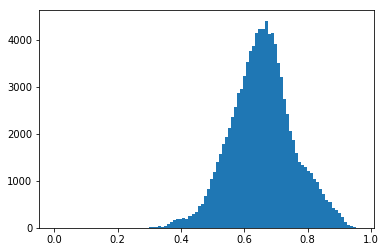

In [173]:
plt.hist( np.arccos(a) / (np.pi/2), 100 );

In [105]:
( exprs.X[1719,:] * exprs.X[19,:].transpose() ).todense()

matrix([[0.85612252]])